# UNEMPLOYMENT ANALYSIS WITH PYTHON

# Author: Dimple Kaushik

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Loading dataset

In [2]:
df= pd.read_csv(r'D:\Oasis\t2\Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [3]:
df.shape

(768, 7)

In [4]:
df.size

5376

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Data cleaning

In [7]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.dropna(inplace= True)

In [9]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
df.rename(columns= {' Date':'Date', ' Frequency': 'Frequency',
                    ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)',
                    ' Estimated Employed': 'Estimated Employed',
                    ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)'}, inplace= True)

In [13]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [15]:
df['Date'] = df['Date'].astype('datetime64[ns]')

<ipython-input-15-ae53f1db26b5>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = df['Date'].astype('datetime64[ns]')


In [16]:
df['day']= df['Date'].dt.day

In [17]:
df['month']= df['Date'].dt.month_name()

In [18]:
df['year']= df['Date'].dt.year

In [19]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


# Data Visualisation

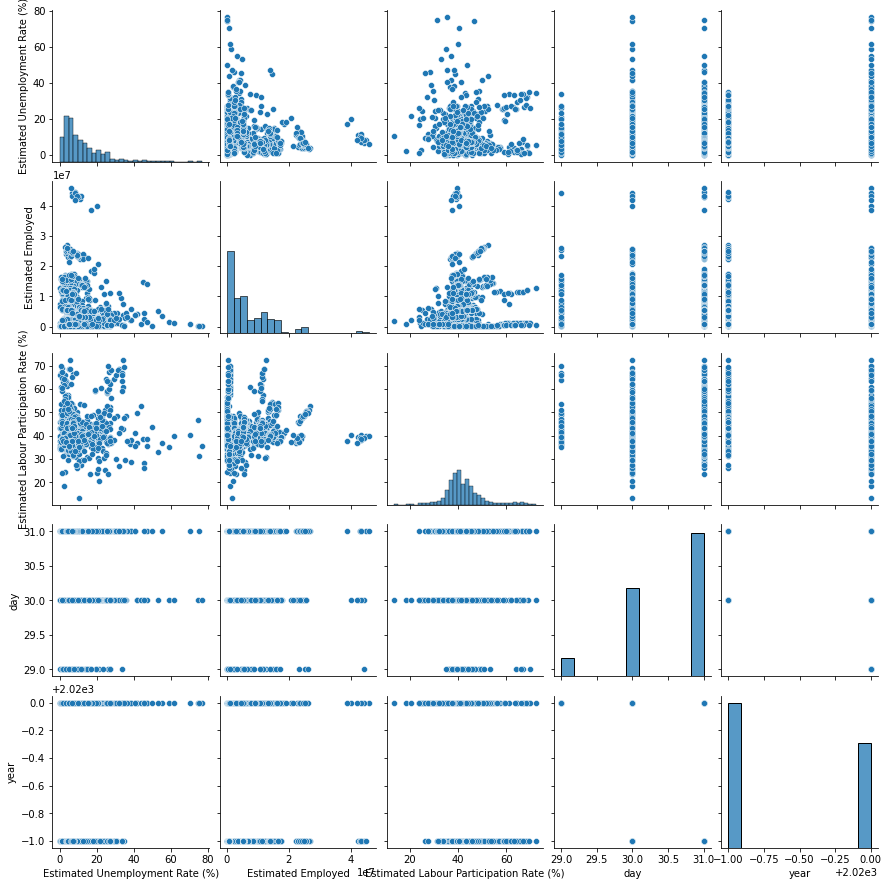

In [20]:
sns.pairplot(df)

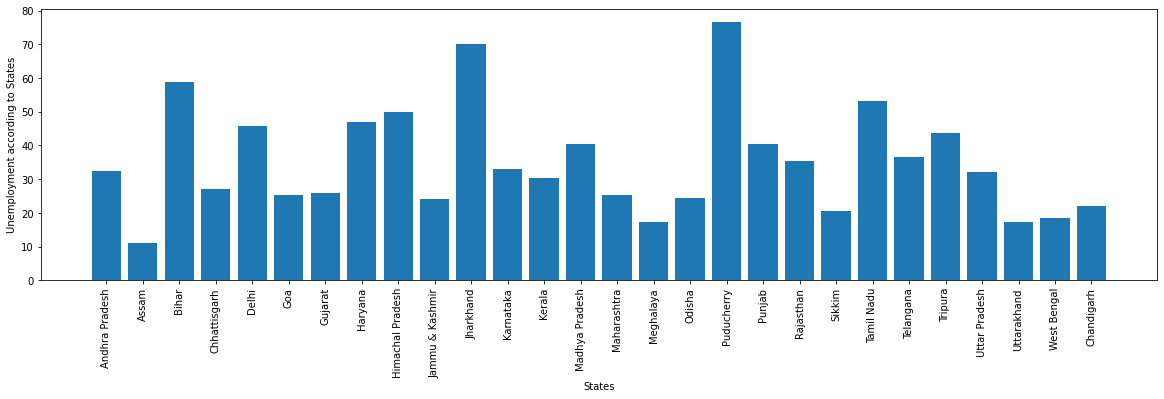

In [21]:
plt.figure(figsize = (20,5))
plt.bar(df['Region'],df['Estimated Unemployment Rate (%)'])
plt.xticks(rotation = 'vertical')
plt.xlabel('States')
plt.ylabel('Unemployment according to States')
plt.show()

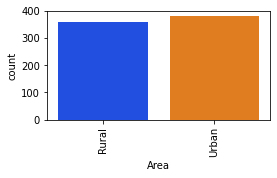

In [22]:
plt.figure(figsize = (4, 2))
sns.countplot(x= df['Area'],palette = "bright")
plt.xticks(rotation='vertical')
plt.show()

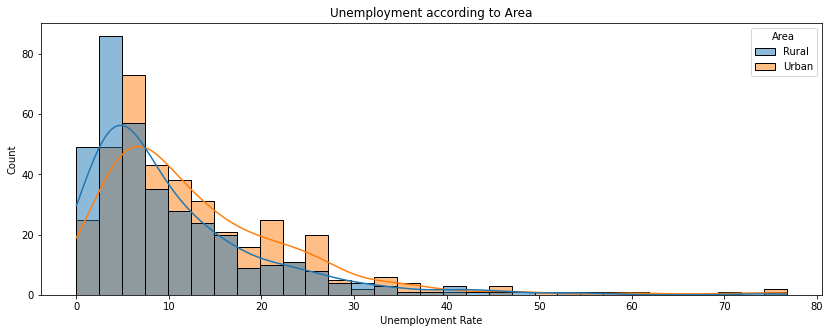

In [23]:
plt.figure(figsize = (14,5))
sns.histplot(x= 'Estimated Unemployment Rate (%)', data=df, kde=True, hue='Area')
plt.title('Unemployment according to Area')
plt.xlabel('Unemployment Rate')
plt.show()

In [24]:
df['month'].value_counts()

month
May          105
June         104
October       55
November      55
July          54
August        53
December      53
January       53
February      53
September     52
March         52
April         51
Name: count, dtype: int64

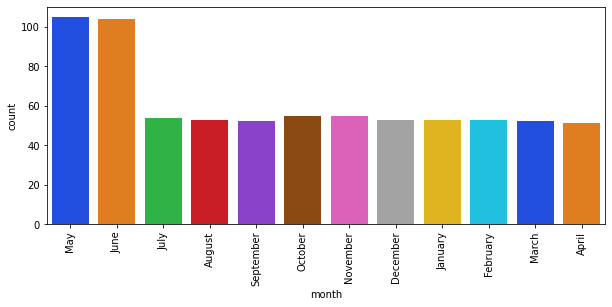

In [25]:
plt.figure(figsize = (10, 4))
sns.countplot(x= df['month'], palette = "bright")
plt.xticks(rotation='vertical')
plt.show()

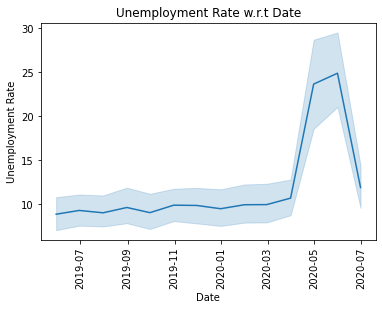

In [26]:
sns.lineplot(y= 'Estimated Unemployment Rate (%)', x= 'Date', data=df)
plt.title('Unemployment Rate w.r.t Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate')
plt.show()

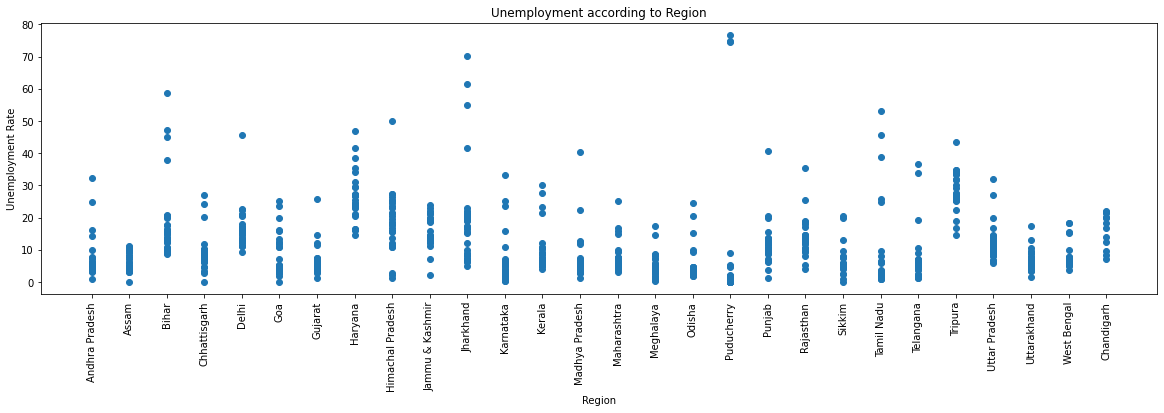

In [27]:
plt.figure(figsize = (20,5))
plt.scatter(df['Region'], df['Estimated Unemployment Rate (%)'])
plt.title('Unemployment according to Region')
plt.xlabel('Region')
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment Rate')
plt.show()

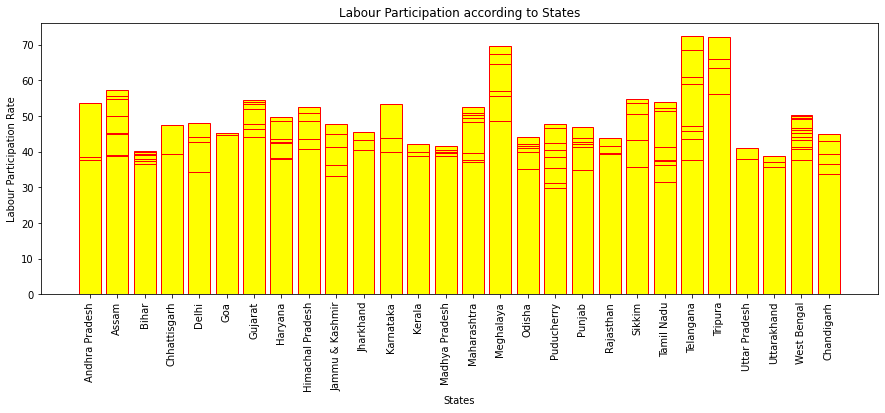

In [28]:
plt.figure(figsize = (15,5))
plt.bar(df['Region'], df['Estimated Labour Participation Rate (%)'], color=['yellow'], edgecolor='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Labour Participation Rate')
plt.title('Labour Participation according to States')
plt.show()

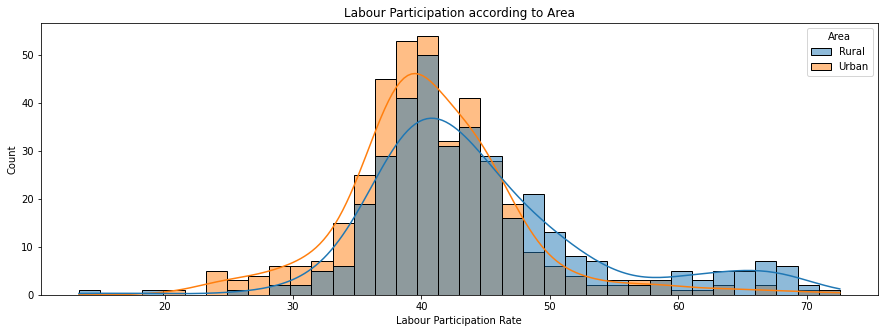

In [29]:
plt.figure(figsize = (15,5))
sns.histplot(x= 'Estimated Labour Participation Rate (%)', data=df, kde=True, hue='Area')
plt.title('Labour Participation according to Area')
plt.xlabel('Labour Participation Rate')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


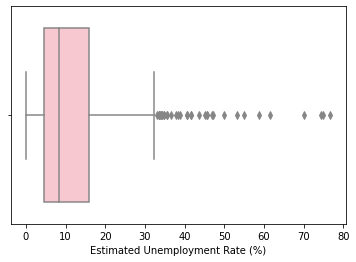

In [30]:
sns.boxplot(df['Estimated Unemployment Rate (%)'],color="pink")
plt.show()

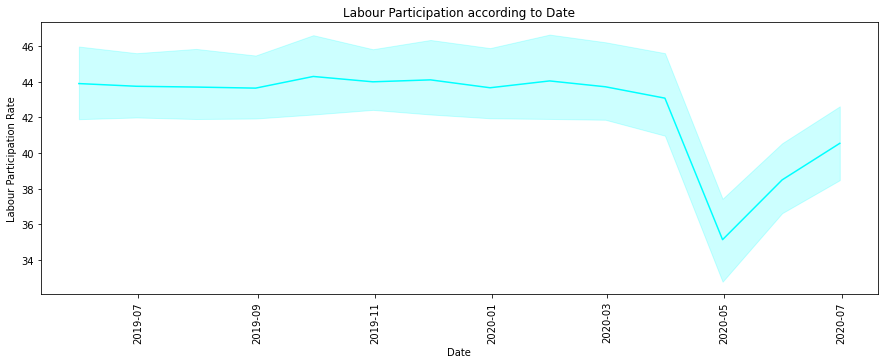

In [31]:
plt.figure(figsize = (15,5))
sns.lineplot(y= 'Estimated Labour Participation Rate (%)', x='Date', data=df, color='cyan')
plt.title('Labour Participation according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Labour Participation Rate')
plt.show()

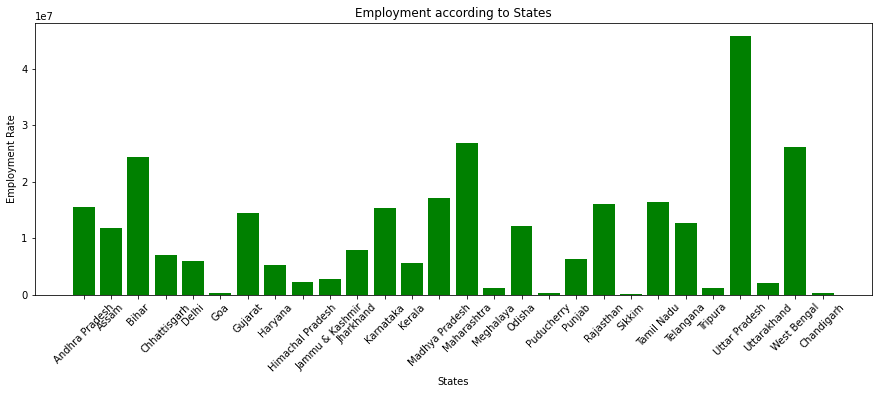

In [32]:
plt.figure(figsize = (15,5))
plt.bar(df['Region'], df['Estimated Employed'], color='green')
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Employment Rate')
plt.title('Employment according to States')
plt.show()

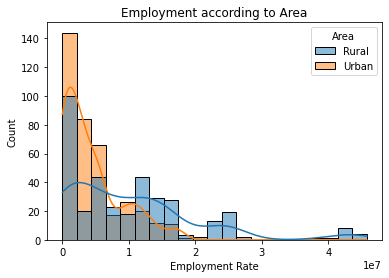

In [33]:
sns.histplot(x= 'Estimated Employed', data=df, kde=True, hue='Area')
plt.title('Employment according to Area')
plt.xlabel('Employment Rate')
plt.show()

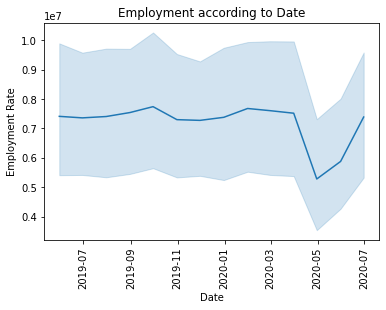

In [34]:
sns.lineplot(y= 'Estimated Employed', x= 'Date', data=df)
plt.title('Employment according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Employment Rate')
plt.show()

# Conclusion

Most impacted states/UT
Puducherry

Jharkhand

Bihar

Haryana

Tripura